### [GOOGLE COLAB ÜZERİNDE ÇALIŞTIR!](http://colab.research.google.com/github/fuatbeser/python-notlarim/blob/master/scikitlearn_tutorial_turkish.ipynb)

- [Github](https://github.com/fuatbeser/python-notlarim)
- [Jupyter Notebook Viewer](http://nbviewer.jupyter.org/github/fuatbeser/python-notlarim/blob/master/scikitlearn_tutorial_turkish.ipynb)

Eğer bir soğutucu kullanmıyorsanız zaman zaman bilgisayarlarımız işlem yükünden (ya da diğer problemlerden) dolayı ısınır. Bilgisayarlarda CPU, GPU ve anakart sıcaklıkları sensörler yardımıyla ayrı ayrı ölçülebiliyor. Bilgisayarın zarar görmemesi için sıcaklığa bağlı olarak farklı devirlerde çalışır.

Bilgisayarın sıcaklığına T diyelim. Bu sıcaklığın 30 derece ile 80 derece arasında olabileceğini varsayalım. 

Fan devir hızına da S diyelim. Bunun da 1500 rpm ile 3000 rpm arasında değiştiğini varsayalım.

Her iki değeri de çok hassas bir şekilde ölçebildiğimizi varsayalım.

Sıcaklık ile fan devir hızı arasındaki matematiksel bağıntıyı geliştiren kişi net olarak söylemediği sürece bilmemiz çok zordur. Tek bir bildiğimiz şey; belirli belirli bir kurala göre yapıldığıdır. En azından öyle umuyoruz. 

Peki sizden sıcaklık değerine göre fan devir hızını tahmin eden bir program geliştirmeniz istenseydi ne yapardınız?

Hadi başlayalım!

# **Adım 1: Ölçümler**

İlk yapacağımız şey sıcaklık ve fan devir hızını ölçüp bir yere kaydetmek. Her bir sıcaklık değerine karşılık gelen aşağıdaki devir hızlarını elde etmiş olalım:

*   30 > 1500
*   33.5 > 1556 
*   36.2 > 1692
*   36.3 > 1697
*   40.4 > 1770
*   50.7 > 2241
*   62.4 > 2512
*   75.6 > 2851

Sayılar tamamen hayal ürünüdür.

# **Adım 2: Basit Bir Model Oluşturalım**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 100

In [2]:
T = np.array([30.0, 33.5, 36.2, 36.3, 40.4, 50.7, 62.4, 75.6], dtype=float).reshape(-1,1)
S = np.array([1500.0, 1556.0, 1692.0, 1697.0, 1770.0, 2241.0, 2515.0, 2851.0], dtype=float).reshape(-1,1)

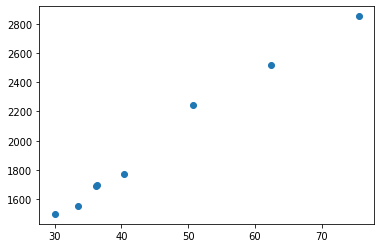

In [3]:
plt.scatter(T, S)

In [4]:
model = LinearRegression()

model.fit(T, S)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
test = np.array([55.2, 41.5, 70.0, 57.3]).reshape(-1,1)

#**Adım 3: Eğitilmiş modeli test edelim**

In [6]:
predicted = model.predict(test)
print(predicted)

[[2272.60648411]
 [1850.17157354]
 [2728.9595262 ]
 [2337.35928063]]


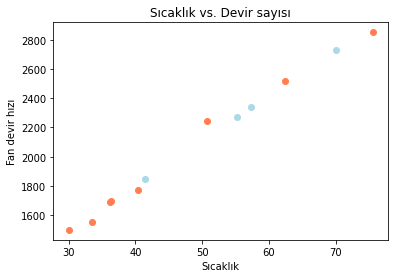

In [7]:
plt.scatter(T, S, c='coral')
plt.scatter(test, predicted, c='lightblue')

plt.title('Sıcaklık vs. Devir sayısı')
plt.xlabel('Sıcaklık')
plt.ylabel('Fan devir hızı')
plt.show()